In [105]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
df=pd.read_csv(r'Irish_DataSet\standardData2.txt',header=None,delimiter=" ")
# df=pd.read_csv(r'Irish_DataSet\standardMetersForSmallData.txt',header=None,delimiter=" ")
df.rename(columns={0: "ID", 1: "Duration", 2: "Consumption"},inplace=True)

In [106]:
df = df.iloc[:, [0,-1]]
df= df.iloc[:8550]
df

,ID,Consumption
0,1002,0.481127
1,1002,0.085061
2,1002,0.158161
3,1002,0.030569
4,1002,0.186071
...,...,...
8545,1002,0.251196
8546,1002,0.143541
8547,1002,0.248538
8548,1002,0.000000


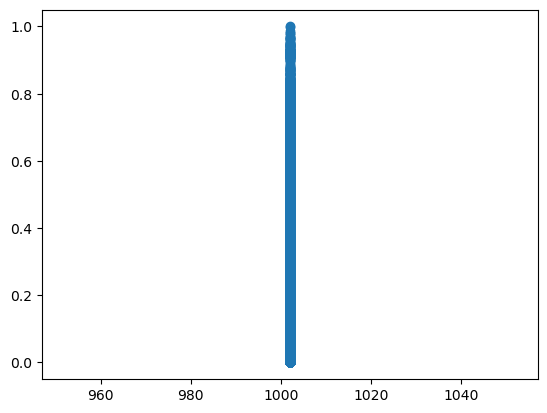

In [71]:
plt.scatter(df.iloc[:,0], df.iloc[:,1])

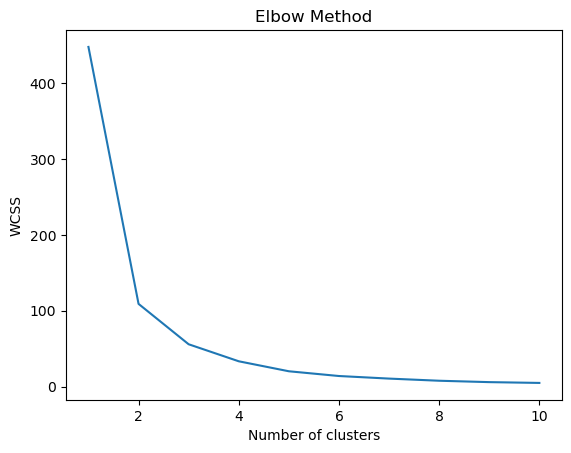

In [72]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init = "k-means++", 
                   max_iter= 300, n_init=10)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title("Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

In [73]:
kmeans = KMeans(n_clusters=3, init= "k-means++",
               max_iter= 300, n_init=10)
labels = kmeans.fit_predict(df)
np.unique(labels)

array([0, 1, 2])

In [94]:
clustering  = DBSCAN(eps = 0.2, min_samples = 2).fit(df)

In [95]:
clustering.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [96]:
from sklearn.neighbors import NearestNeighbors
import seaborn as sns

In [107]:
neigh = NearestNeighbors(n_neighbors = 2)
nbrs = neigh.fit(df)
distances, indices = nbrs.kneighbors(df)

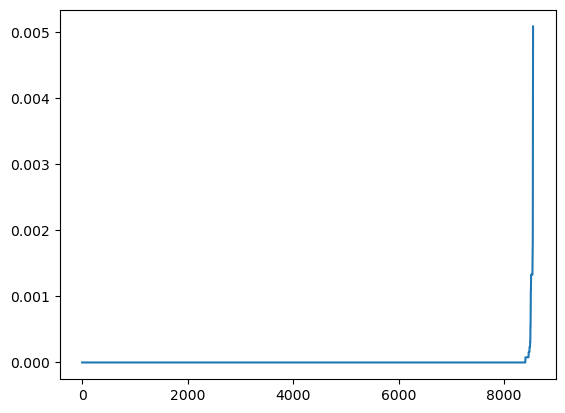

In [110]:
distances = np.sort(distances, axis = 0)
distances = distances[:, 1]
plt.plot(distances)

In [174]:
dbscancluster = DBSCAN(eps = 0.005, min_samples = 5)
dbscancluster.fit(df)

DBSCAN(eps=0.005)

In [175]:
clusters =dbscancluster.labels_
len(set(clusters))

6

In [176]:
from sklearn.metrics import silhouette_score
silhouette_score(df, clusters)

-0.0671629859945711

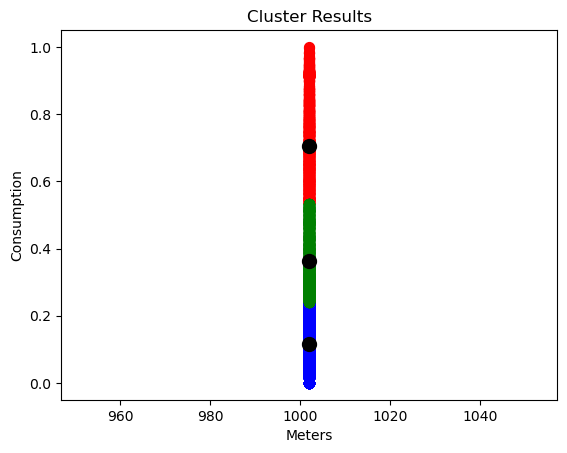

In [74]:
plt.scatter(df.iloc[labels==0,0], df.iloc[labels==0,1], s=50, c= "red")
plt.scatter(df.iloc[labels==1,0], df.iloc[labels==1,1], s=50, c= "blue")
plt.scatter(df.iloc[labels==2,0], df.iloc[labels==2,1], s=50, c= "green")
plt.scatter(df.iloc[labels==3,0], df.iloc[labels==3,1], s=50, c= "yellow")
# plt.scatter(df.iloc[labels==4,0], df.iloc[labels==4,1], s=50, c= "brown")
plt.scatter(kmeans.cluster_centers_[:,0],
           kmeans.cluster_centers_[:,1], s=100, c= "black")
plt.title("Cluster Results")
plt.xlabel("Meters")
plt.ylabel("Consumption")
plt.show()